# Phase 1 - Business Understanding

Background:	Titanic shipwreck with - On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

Objectives: Predict passanger survival 

Analytical Objectif: Classify passangers in two classes: Survival and Death

Success Criteria: Accuracy of 80 %

Hypothesis: - Survival depends on economic factors
            - Survival depends on gender
            - Survival depends on age 


# Phase 2 - Data Understanding

**Importing Libraries**

In [123]:
import pandas as pd

In [72]:
import numpy as np

In [73]:
import matplotlib.pyplot as plt

In [74]:
import seaborn as sns

In [75]:
import sklearn as sk

In [76]:
import tensorflow as tf

In [77]:
from tensorflow import keras

In [78]:
import sklearn as sk

**Importing dataset**

In [79]:
df_train = pd.read_excel('train.xlsx')


In [80]:
df_train.head(10)

,Kaggle_Pass_Id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,orig_seq
0,1,3,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,"Bridgerule, Devon",690
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4,NaN,"New York, NY",86
2,3,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,NaN,861
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,D,NaN,"Scituate, MA",128
4,5,3,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,"Lower Clapton, Middlesex or Erdington, Birmingham",619
5,6,3,0,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN,NaN,NaN,1031
6,7,1,0,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,NaN,175.0,"Dorchester, MA",202
7,8,3,0,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,NaN,4.0,NaN,1097
8,9,3,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,15,NaN,NaN,900
9,10,2,1,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,NaN,NaN,"New York, NY",514


**Describing data**

In [81]:
# Cheking dataset size
df_train.shape

(891, 16)

In [82]:
# Describing dataset
df_train.describe()

,Kaggle_Pass_Id,pclass,survived,age,sibsp,parch,fare,body,orig_seq
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,83.000000,891.000000
mean,446.000000,2.308642,0.383838,29.699113,0.523008,0.381594,32.204208,162.843373,662.304153
std,257.353842,0.836071,0.486592,14.526507,1.102743,0.806057,49.693429,96.945356,378.282967
min,1.000000,1.000000,0.000000,0.416700,0.000000,0.000000,0.000000,4.000000,1.000000
25%,223.500000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,73.500000,335.500000
50%,446.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,169.000000,666.000000
75%,668.500000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,252.000000,993.500000
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,328.000000,1309.000000


In [83]:
# Checking if exists null values
df_train.isnull().sum()

Kaggle_Pass_Id      0
pclass              0
survived            0
name                0
sex                 0
age               177
sibsp               0
parch               0
ticket              0
fare                0
cabin             687
embarked            2
boat              561
body              808
home.dest         392
orig_seq            0
dtype: int64

**EDA**

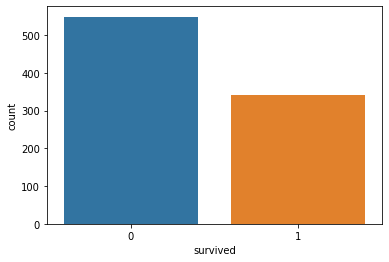

In [84]:
# Checking the data distribution for each class
sns.countplot(data=df_train, x='survived');

In [85]:
# Checking the data distribution for each class
df_train['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

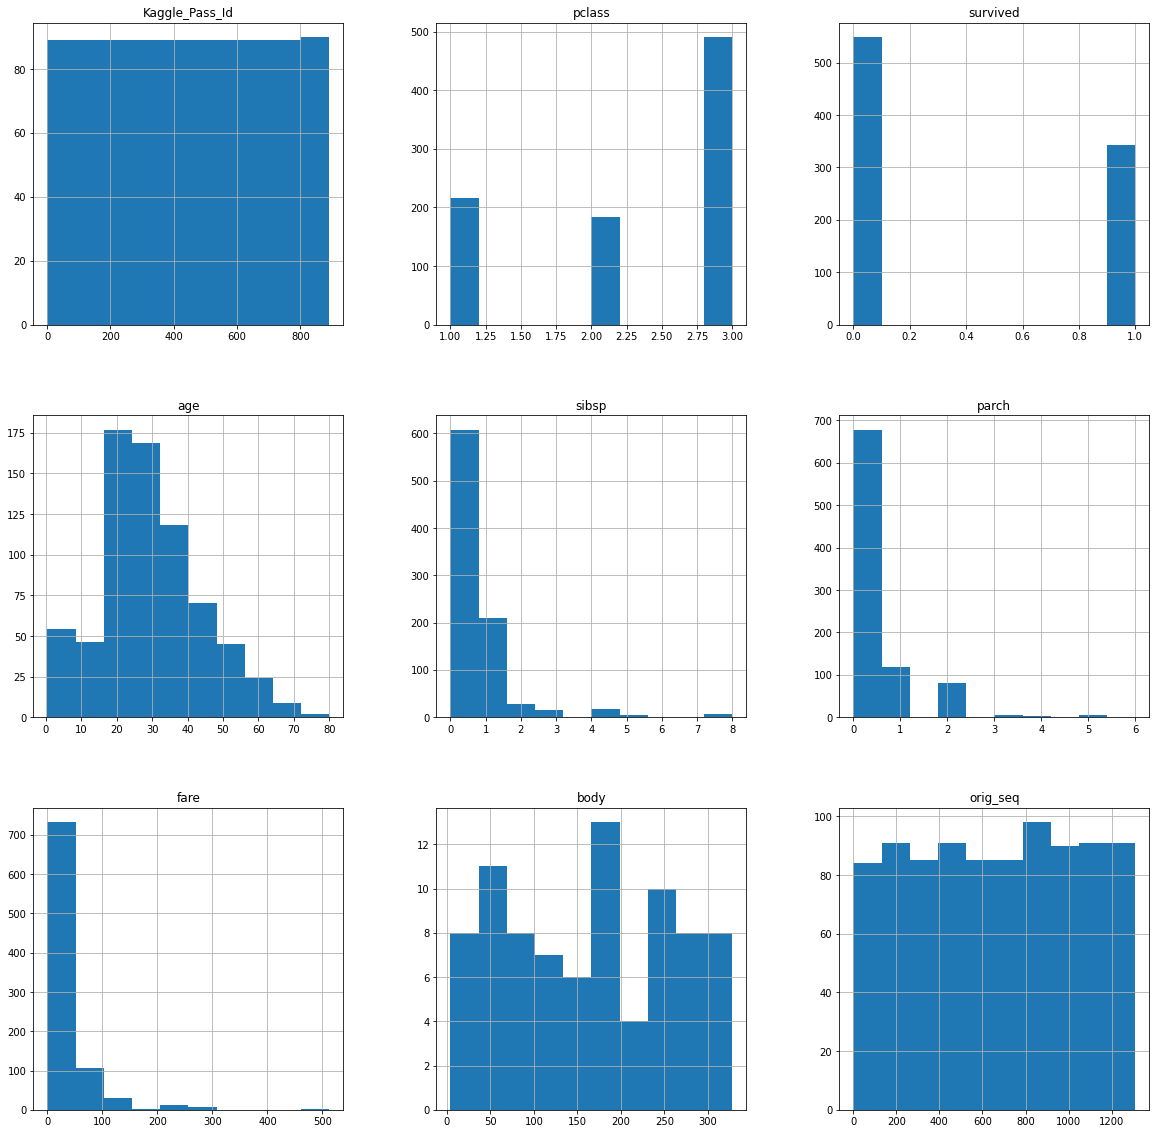

In [86]:
# Checking the dataset
df_train.hist(figsize = (20, 20))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f183bb45dd0>]],
      dtype=object)

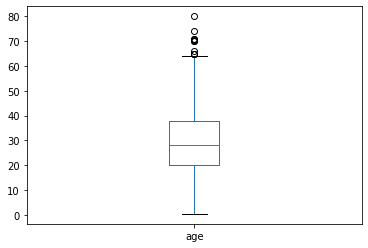

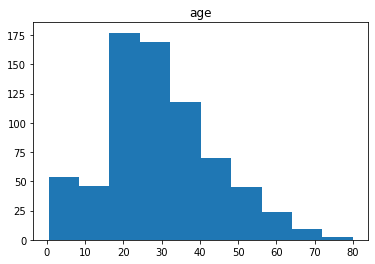

In [87]:
# Deciding what to com with missing values
df_train.boxplot(column =['age'],grid = False)
df_train.hist(column =['age'],grid = False)

In [88]:
# Replacing categorical values for numerical
df_train['sex'] = df_train['sex'].map({'male': 0,'female': 1})

# Phase 3 - Data Preparation

In [89]:
# Replacing missing values with mean and checking
df_train['age'] = df_train['age'].fillna((df_train['age'].mean()))
df_train.isnull().sum()

Kaggle_Pass_Id      0
pclass              0
survived            0
name                0
sex                 0
age                 0
sibsp               0
parch               0
ticket              0
fare                0
cabin             687
embarked            2
boat              561
body              808
home.dest         392
orig_seq            0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


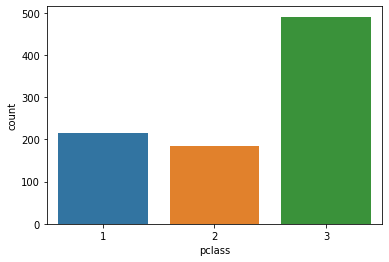

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


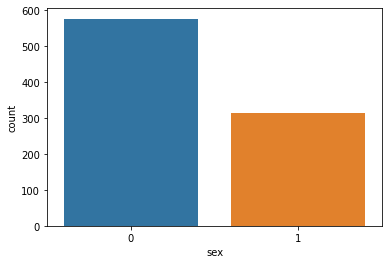

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


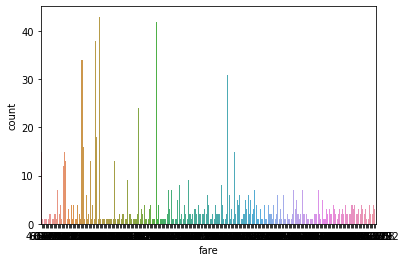

In [90]:
# Generating hypothesis
sns.countplot(df_train['pclass'],label="survived")
plt.show()
sns.countplot(df_train['sex'],label="survived")
plt.show()
sns.countplot(df_train['fare'],label="survived")
plt.show()


In [91]:
select_train = df_train[["age", "sex", "pclass", "fare"]]

In [92]:
select_train.head(10)

,age,sex,pclass,fare
0,22.000000,0,3,7.2500
1,38.000000,1,1,71.2833
2,26.000000,1,3,7.9250
3,35.000000,1,1,53.1000
4,35.000000,0,3,8.0500
5,29.699113,0,3,8.4583
6,54.000000,0,1,51.8625
7,2.000000,0,3,21.0750
8,27.000000,1,3,11.1333
9,14.000000,1,2,30.0708


In [93]:
x = select_train
y = df_train["survived"]
print(x)
print(y)

           age  sex  pclass     fare
0    22.000000    0       3   7.2500
1    38.000000    1       1  71.2833
2    26.000000    1       3   7.9250
3    35.000000    1       1  53.1000
4    35.000000    0       3   8.0500
..         ...  ...     ...      ...
886  27.000000    0       2  13.0000
887  19.000000    1       1  30.0000
888  29.699113    1       3  23.4500
889  26.000000    0       1  30.0000
890  32.000000    0       3   7.7500

[891 rows x 4 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64


Split Train & Test

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [96]:
print(X_train)
print(Y_train)
print(X_test)
print(Y_test)


           age  sex  pclass     fare
140  29.699113    1       3  15.2458
439  31.000000    0       2  10.5000
817  31.000000    0       2  37.0042
378  20.000000    0       3   4.0125
491  21.000000    0       3   7.2500
..         ...  ...     ...      ...
835  39.000000    1       1  83.1583
192  19.000000    1       3   7.8542
629  29.699113    0       3   7.7333
559  36.000000    1       3  17.4000
684  60.000000    0       2  39.0000

[712 rows x 4 columns]
140    0
439    0
817    0
378    0
491    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: survived, Length: 712, dtype: int64
           age  sex  pclass      fare
495  29.699113    0       3   14.4583
648  29.699113    0       3    7.5500
278   7.000000    0       3   29.1250
31   29.699113    1       1  146.5208
255  29.000000    1       3   15.2458
..         ...  ...     ...       ...
780  13.000000    1       3    7.2292
837  29.699113    0       3    8.0500
215  31.000000    1       1  113.2750
833  23.000

Scalling dataset

In [97]:
from sklearn.preprocessing import StandardScaler 

In [98]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Phase 4 - Modeling

Importimg Decision Tree Libraries

In [99]:
from sklearn.tree import DecisionTreeClassifier

In [100]:
from sklearn import tree


In [101]:
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 


In [102]:
from sklearn.tree import plot_tree

In [103]:
import pydotplus

In [104]:
import matplotlib.pyplot as plt

In [105]:
import matplotlib.image as pltimg

Creating Tree

In [106]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, Y_train)


Visualizing Tree

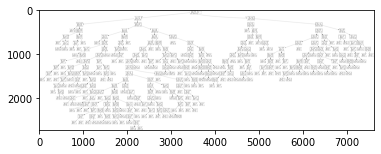

In [107]:
features = ['Age', 'Sex', 'PClass', 'Faire']
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

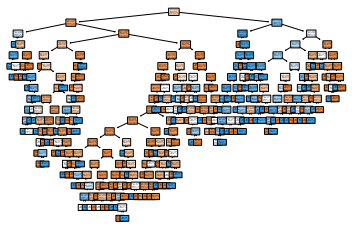

In [108]:
dec_tree = plot_tree(decision_tree=dtree, feature_names = select_train.columns, 
                     class_names =["Death", "Survival"] , filled = True , precision = 4, rounded = True)

Predicting the class

In [109]:
y_pred = dtree.predict(X_test)

# Phase 5 - Evaluation

In [112]:
print("Classification report - \n", classification_report(Y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.82      0.87      0.85       110
           1       0.77      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [111]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dtree.score(X_train, Y_train)))

Accuracy of Decision Tree classifier on training set: 0.98


In [113]:
print('Accuracy of Decision Tree classifier on test: {:.2f}'
     .format(dtree.score(X_test, Y_test)))

Accuracy of Decision Tree classifier on test: 0.80


In [115]:
cm = confusion_matrix(Y_test, y_pred)

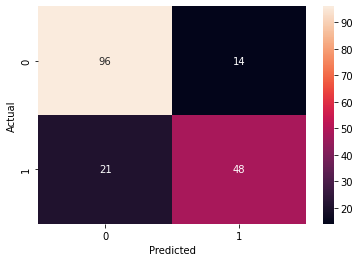

In [117]:
confusion_matrix = pd.crosstab(Y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

Evaluation Metrics

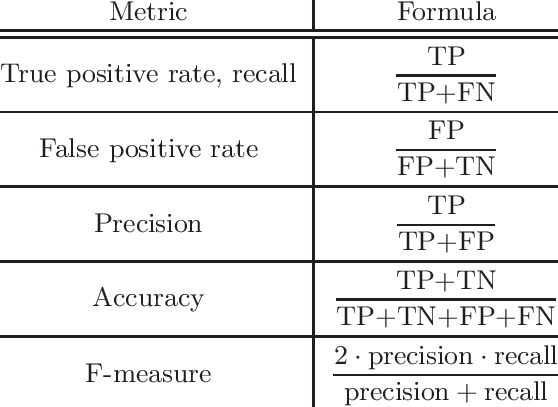

Confusion Matrix Schema

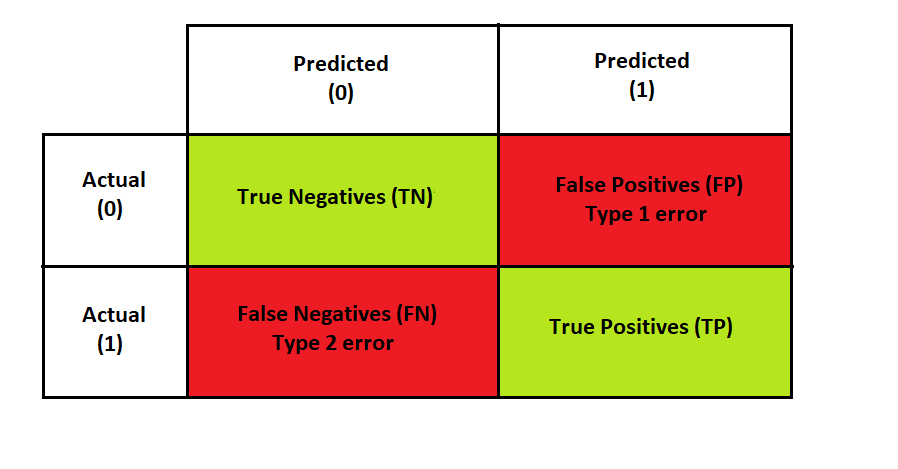